# Table of Contents
1.&nbsp;&nbsp;&nbsp;[Introduction](#Introduction)

2.&nbsp;&nbsp;&nbsp;[Imports](#Imports)

3.&nbsp;&nbsp;&nbsp;[Data Cleaning](#Data-Cleaning)
   - 2.1&nbsp;&nbsp;&nbsp;[Missing values](#Missing-values)
   - 2.2&nbsp;&nbsp;&nbsp;[Feature Selection](#Feature-Selection)
   - 2.3&nbsp;&nbsp;&nbsp;[Target Feature Transformation](#Target-Feature-Transformation)

4.&nbsp;&nbsp;&nbsp;[Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-EDA)
   - 3.1&nbsp;&nbsp;&nbsp;[Distribution of features](#Distribution-of-features)
   - 3.2&nbsp;&nbsp;&nbsp;[Correlation Heatmap](#Correlation-Heatmap)
   - 3.3&nbsp;&nbsp;&nbsp;[Boxplots for features](#Boxplots-for-features)

5.&nbsp;&nbsp;&nbsp;[Functions](#Functions)
   - 4.1&nbsp;&nbsp;&nbsp;[Create polynomial features and scale the data](#Create-polynomial-features-and-scale-the-data)
   - 4.2&nbsp;&nbsp;&nbsp;[Function to train and evaluate models](#Function-to-train-and-evaluate-models)
   - 4.3&nbsp;&nbsp;&nbsp;[Function to plot the confusion matrix](#Function-to-plot-the-confusion-matrix)
   - 4.4&nbsp;&nbsp;&nbsp;[Function to plot individual graphs for each metric](#Function-to-plot-individual-graphs-for-each-metric)

6.&nbsp;&nbsp;&nbsp;[Model Training and Testing](#Model-Training-and-Testing)
   - 5.1&nbsp;&nbsp;&nbsp;[Random Forest](#Random-Forest)
   - 5.2&nbsp;&nbsp;&nbsp;[Logistic Regression](#Logistic-regression)
   - 5.3&nbsp;&nbsp;&nbsp;[Support Vector Machine](#Support-Vector-Machine)
   - 5.4&nbsp;&nbsp;&nbsp;[XGBoost](#XGBoost)
   - 5.5&nbsp;&nbsp;&nbsp;[K-Nearest Neighbors](#K-Nearest-Neighbors)
   - 5.6&nbsp;&nbsp;&nbsp;[Gaussian Naive Bayes (No hyperparameters to tune)](#Gaussian-Naive-Bayes-(No-hyperparameters-to-tune))
   - 5.7&nbsp;&nbsp;&nbsp;[Multinomial Naive Bayes (Requires MinMax scaling)](#Multinomial-Naive-Bayes-(Requires-MinMax-scaling))

7.&nbsp;&nbsp;&nbsp;[Comparing Models](#Comparing-Models)

8.&nbsp;&nbsp;&nbsp;[Conclusion](#Conclusion)

9.&nbsp;&nbsp;&nbsp;[References](#References)

# Introduction

In this project, titled "Lung Cancer Classification using Computerized Tomography (CT) Data" we aim to develop a robust machine learning solution to automatically classify lung nodules as malignant or benign based on features extracted from CT scans. 

Our approach involves feature extraction, data preprocessing and cleaning, feature selection and model training. Radiomic features are extracted using the PyRadiomics library, while nodule segmentation is performed using tools like pylidc to process LIDC-IDRI CT scans. 

# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, StratifiedGroupKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score, balanced_accuracy_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
import warnings
from sklearn.exceptions import ConvergenceWarning
import xgboost as xgb
from sklearn.model_selection import GroupShuffleSplit
import numpy as np
from imblearn.pipeline import Pipeline

# Data Cleaning

In [2]:
# Load the dataset
file_path = "C:\\Users\\Benedita\\Desktop\\LIACD\\3ano\\1semestre\\LabIACD\\Project1\\ct_scan_features_grouped_with_radiomics.csv"
df = pd.read_csv(file_path)

In [3]:
# Check the first few rows
df.head()

,patient_id,nodule_id,diameter,surface_area,volume,spiculation,malignancy,margin,lobulation,texture,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,LIDC-IDRI-0078,Nodule_2,19.500000,1135.239277,2621.823750,2,3.75,4,2,5,...,2.761356e-07,2.761356e-07,-3.203427e-16,0.000525,0.000000e+00,0.0,1000000.0,0.0,0.0,0.0
1,LIDC-IDRI-0078,Nodule_1,20.840585,1124.125177,2439.303750,1,3.75,2,4,5,...,3.299153e-07,3.299153e-07,-3.203427e-16,0.000574,0.000000e+00,0.0,1000000.0,0.0,0.0,0.0
2,LIDC-IDRI-0078,Nodule_8,5.076662,66.910605,62.107500,1,1.00,5,1,5,...,8.650519e-04,8.650519e-04,-3.203427e-16,0.029412,0.000000e+00,0.0,1000000.0,0.0,0.0,0.0
3,LIDC-IDRI-0078,Nodule_3,23.300483,1650.898027,4332.315000,3,4.25,2,4,5,...,6.666667e-01,6.666667e-01,9.182958e-01,0.000823,2.949211e+06,0.0,1000000.0,0.0,0.0,0.0
4,LIDC-IDRI-0069,Nodule_16,12.683877,505.336348,803.854584,5,3.25,5,5,5,...,3.684042e-06,3.684042e-06,-3.203427e-16,0.001919,0.000000e+00,0.0,1000000.0,0.0,0.0,0.0


### Missing values

In [4]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values per feature:\n", missing_values)

Missing values per feature:
 patient_id                   0
nodule_id                    0
diameter                     0
surface_area                 0
volume                       0
                            ..
original_ngtdm_Busyness      0
original_ngtdm_Coarseness    0
original_ngtdm_Complexity    0
original_ngtdm_Contrast      0
original_ngtdm_Strength      0
Length: 143, dtype: int64


There are no null values, so we don't need to handle them.

### Feature Selection

In [5]:
# Get summary statistics for numeric columns
summary_stats = df.describe()
print("Summary statistics:\n", summary_stats)

Summary statistics:
           diameter  surface_area        volume  spiculation   malignancy  \
count  2651.000000   2651.000000   2651.000000  2651.000000  2651.000000   
mean     10.189805    385.505973    644.851159     1.460581     2.695346   
std       6.904808    728.083893   1818.472454     0.955743     0.919823   
min       2.544731      9.744529      6.801801     1.000000     1.000000   
25%       6.056497     83.012255     62.313574     1.000000     2.000000   
50%       7.812500    140.387354    121.445618     1.000000     2.750000   
75%      11.088933    302.769868    330.423730     2.000000     3.000000   
max      49.944618   9026.567042  31112.197113     5.000000     5.000000   

            margin   lobulation      texture   sphericity  internal_structure  \
count  2651.000000  2651.000000  2651.000000  2651.000000         2651.000000   
mean      3.930215     1.548849     4.397209     3.754055            1.009430   
std       1.212527     0.970980     1.231158     0.

The features original_ngtdm_Busyness, original_ngtdm_Coarseness, original_ngtdm_Complexity, original_ngtdm_Contrast, original_ngtdm_Strength have zero variance (mean and standard deviation are 0, or constant values like 1000000 for coarseness).
This indicates that these features don't provide useful information as they are constant across the entire dataset.

So we decided to drop these columns since they don't provide variability or useful information for classification:

In [6]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Identify columns with very low variance or constant values
low_variance_threshold = 0.01  
low_variance_features = numeric_df.var()[numeric_df.var() < low_variance_threshold].index

# Drop columns with low or zero variance from the original dataframe
df = df.drop(columns=low_variance_features)

In [7]:
# Check the first few rows
df.head()

,patient_id,nodule_id,diameter,surface_area,volume,spiculation,malignancy,margin,lobulation,texture,...,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZoneVariance
0,LIDC-IDRI-0078,Nodule_2,19.500000,1135.239277,2621.823750,2,3.75,4,2,5,...,15.132577,0.244577,0.244577,0.244577,1.0,3621409.0,3621409.0,3621409.0,-3.203427e-16,0.000000e+00
1,LIDC-IDRI-0078,Nodule_1,20.840585,1124.125177,2439.303750,1,3.75,2,4,5,...,13.643241,0.213370,0.213370,0.213370,1.0,3031081.0,3031081.0,3031081.0,-3.203427e-16,0.000000e+00
2,LIDC-IDRI-0078,Nodule_8,5.076662,66.910605,62.107500,1,1.00,5,1,5,...,0.533921,0.595154,0.595154,0.595154,1.0,1156.0,1156.0,1156.0,-3.203427e-16,0.000000e+00
3,LIDC-IDRI-0078,Nodule_3,23.300483,1650.898027,4332.315000,3,4.25,2,4,5,...,24.509648,0.163406,0.163406,0.163406,3.0,4426246.0,4426246.0,4426246.0,9.182958e-01,2.949211e+06
4,LIDC-IDRI-0069,Nodule_16,12.683877,505.336348,803.854584,5,3.25,5,5,5,...,4.660877,0.288292,0.288292,0.288292,1.0,271441.0,271441.0,271441.0,-3.203427e-16,0.000000e+00


In [8]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['patient_id', 'nodule_id', 'diagnostics_Versions_PyRadiomics',
       'diagnostics_Versions_Numpy', 'diagnostics_Versions_SimpleITK',
       'diagnostics_Versions_PyWavelet', 'diagnostics_Versions_Python',
       'diagnostics_Configuration_Settings',
       'diagnostics_Configuration_EnabledImageTypes',
       'diagnostics_Image-original_Hash',
       'diagnostics_Image-original_Dimensionality',
       'diagnostics_Image-original_Spacing', 'diagnostics_Image-original_Size',
       'diagnostics_Mask-original_Hash', 'diagnostics_Mask-original_Spacing',
       'diagnostics_Mask-original_Size',
       'diagnostics_Mask-original_BoundingBox',
       'diagnostics_Mask-original_CenterOfMassIndex',
       'diagnostics_Mask-original_CenterOfMass'],
      dtype='object')


The non-numeric columns in the dataset consist of identifiers, diagnostics, and metadata about the image processing. Since none of these are likely to provide useful information for the classification task, we are going to drop them:

In [9]:
# Drop all non-numeric columns except patient_id
df = df.drop(columns=['nodule_id', 'diagnostics_Versions_PyRadiomics',
                      'diagnostics_Versions_Numpy', 'diagnostics_Versions_SimpleITK',
                      'diagnostics_Versions_PyWavelet', 'diagnostics_Versions_Python',
                      'diagnostics_Configuration_Settings', 'diagnostics_Configuration_EnabledImageTypes',
                      'diagnostics_Image-original_Hash', 'diagnostics_Image-original_Dimensionality',
                      'diagnostics_Image-original_Spacing', 'diagnostics_Image-original_Size',
                      'diagnostics_Mask-original_Hash', 'diagnostics_Mask-original_Spacing',
                      'diagnostics_Mask-original_Size', 'diagnostics_Mask-original_BoundingBox',
                      'diagnostics_Mask-original_CenterOfMassIndex', 'diagnostics_Mask-original_CenterOfMass'])

In [10]:
# Check the first few rows
df.head()

,patient_id,diameter,surface_area,volume,spiculation,malignancy,margin,lobulation,texture,sphericity,...,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZoneVariance
0,LIDC-IDRI-0078,19.500000,1135.239277,2621.823750,2,3.75,4,2,5,4,...,15.132577,0.244577,0.244577,0.244577,1.0,3621409.0,3621409.0,3621409.0,-3.203427e-16,0.000000e+00
1,LIDC-IDRI-0078,20.840585,1124.125177,2439.303750,1,3.75,2,4,5,4,...,13.643241,0.213370,0.213370,0.213370,1.0,3031081.0,3031081.0,3031081.0,-3.203427e-16,0.000000e+00
2,LIDC-IDRI-0078,5.076662,66.910605,62.107500,1,1.00,5,1,5,5,...,0.533921,0.595154,0.595154,0.595154,1.0,1156.0,1156.0,1156.0,-3.203427e-16,0.000000e+00
3,LIDC-IDRI-0078,23.300483,1650.898027,4332.315000,3,4.25,2,4,5,4,...,24.509648,0.163406,0.163406,0.163406,3.0,4426246.0,4426246.0,4426246.0,9.182958e-01,2.949211e+06
4,LIDC-IDRI-0069,12.683877,505.336348,803.854584,5,3.25,5,5,5,5,...,4.660877,0.288292,0.288292,0.288292,1.0,271441.0,271441.0,271441.0,-3.203427e-16,0.000000e+00


### Target Feature Transformation

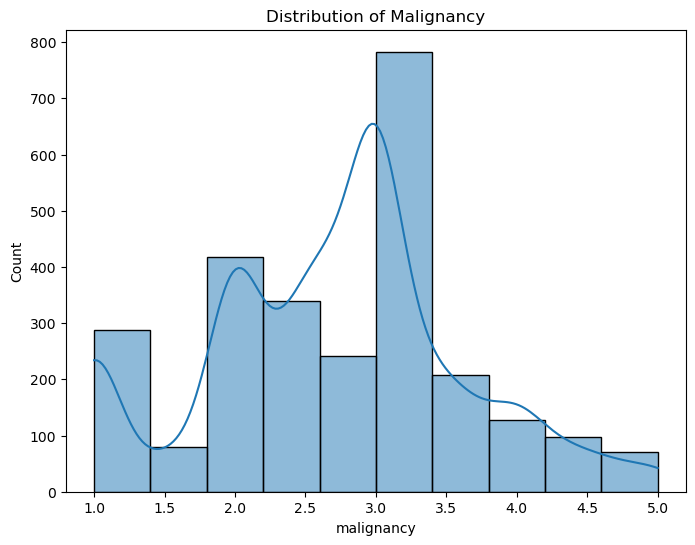

In [11]:
# Plot the distribution of malignancy
plt.figure(figsize=(8, 6))
sns.histplot(df['malignancy'], bins=10, kde=True)
plt.title("Distribution of Malignancy")
plt.show()

The distribution of malignancy is not uniform and many nodules have a malignancy rating of 3. This suggests some class imbalance.

In [12]:
# Drop rows where malignancy is 3
df = df[df['malignancy'] != 3]

# Create a new binary 'is_malignant' column (1 for malignant, 0 for benign)
df['is_malignant'] = df['malignancy'].apply(lambda x: 1 if x > 3 else 0)

Based on the study [CZM+18](#CZM%2B18) and our interpertation of the datatset we decided to regard 3 as the threshold between malignant and non-malignant. This is essential because it makes our prediction colum binary which is necessary for classification algorithms. Therefore the rows where malignancy is equal to 3 will not be useful and so we decided to drop them.


In [13]:
# Check the distribution of the new 'is_malignant' column
df['is_malignant'].value_counts()

0    1365
1     645
Name: is_malignant, dtype: int64

This distribution indicates that the dataset is imbalanced, having significantly more benign cases than malignant. This imbalance could affect the performance of the models, as they may become biased toward predicting the majority class (benign) more frequently.
We need to address this imbalance with techniques like oversampling, undersampling, or using class weights in your models to prevent bias toward more common classes. We are going to try both class weights and SMOTE techniques and based on our results decide which one is better.

In [14]:
# Split into input features (X) and target (y)
X0 = df.drop(columns=['malignancy', 'is_malignant'])  # Drop the original malignancy column and target
y0 = df['is_malignant']  # Binary target (0 for benign, 1 for malignant)
groups = df['patient_id']  # Group by patient_id to ensure nodules from the same patient stay together

# Initialize StratifiedGroupKFold
sgkf = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to collect true labels and predictions across all folds
y0_true_all = []
y0_pred_all = []
y0_prob_all = []


# Iterate through each fold
for fold, (train_index, test_index) in enumerate(sgkf.split(X0, y0, groups=groups)):

    # Split data into train and test sets
    X0_train, X0_test = X0.iloc[train_index], X0.iloc[test_index]
    y0_train, y0_test = y0.iloc[train_index], y0.iloc[test_index]
    
    # Drop the 'patient_id' column before applying transformations
    X0_train = X0_train.drop(columns=['patient_id'])
    X0_test = X0_test.drop(columns=['patient_id'])
    
    # Scale the features
    scaler = StandardScaler()
    X0_train = scaler.fit_transform(X0_train)
    X0_test = scaler.transform(X0_test)
    
    # Train the model using class weights
    model_class_weights = RandomForestClassifier(class_weight='balanced', random_state=42)
    model_class_weights.fit(X0_train, y0_train)

    # Initialize and train a model (e.g., RandomForestClassifier)
    model = RandomForestClassifier(random_state=42, class_weight='balanced')
    model.fit(X0_train, y0_train)

    # Predict on the test set
    y0_pred = model.predict(X0_test)
    y0_prob = model.predict_proba(X0_test)[:, 1]  # Probability for the positive class

    # Append true labels, predictions, and probabilities for each fold
    y0_true_all.extend(y0_test)
    y0_pred_all.extend(y0_pred)
    y0_prob_all.extend(y0_prob)
  
# Convert lists to numpy arrays
y0_true_all = np.array(y0_true_all)
y0_pred_all = np.array(y0_pred_all)
y0_prob_all = np.array(y0_prob_all)

# Evaluate the performance on the aggregated predictions
print("\nFinal Evaluation Across All Folds:")
print("Balanced Accuracy:", balanced_accuracy_score(y0_true_all, y0_pred_all))
print("F1 Score:", f1_score(y0_true_all, y0_pred_all))
print("ROC-AUC:", roc_auc_score(y0_true_all, y0_prob_all))


Final Evaluation Across All Folds:
Balanced Accuracy: 0.8365874435641878
F1 Score: 0.7886382623224728
ROC-AUC: 0.918150893034614


In [15]:
# Split into input features (X) and target (y)
X = df.drop(columns=['malignancy', 'is_malignant'])  # Drop the original malignancy column and target
y = df['is_malignant']  # Binary target (0 for benign, 1 for malignant)
groups = df['patient_id']  # Group by patient_id to ensure nodules from the same patient stay together

# Initialize StratifiedGroupKFold
sgkf = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to collect true labels and predictions across all folds
y_true_all = []
y_pred_all = []
y_prob_all = []

# Iterate through each fold
for fold, (train_index, test_index) in enumerate(sgkf.split(X, y, groups=groups)):

    # Split data into train and test sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Drop the 'patient_id' column before applying transformations
    X_train = X_train.drop(columns=['patient_id'])
    X_test = X_test.drop(columns=['patient_id'])
    
    # Scale the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Apply SMOTE to balance classes in the training set
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    # Initialize and train a model (e.g., RandomForestClassifier)
    model = RandomForestClassifier(random_state=42, class_weight='balanced')
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability for the positive class

    # Append true labels, predictions, and probabilities for each fold
    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)
    y_prob_all.extend(y_prob)

# Convert lists to numpy arrays
y_true_all = np.array(y_true_all)
y_pred_all = np.array(y_pred_all)
y_prob_all = np.array(y_prob_all)

# Evaluate the performance on the aggregated predictions
print("\nFinal Evaluation Across All Folds:")
print("Balanced Accuracy:", balanced_accuracy_score(y_true_all, y_pred_all))
print("F1 Score:", f1_score(y_true_all, y_pred_all))
print("ROC-AUC:", roc_auc_score(y_true_all, y_prob_all))


Final Evaluation Across All Folds:
Balanced Accuracy: 0.8457279154953574
F1 Score: 0.7918622848200313
ROC-AUC: 0.9233773461680439


SMOTE got an slightly better balanced accuracy, F1 score and ROC_AUC, which suggests that it is handling the minority class better than Class Weights, so we decided to go with SMOTE.

# Exploratory Data Analysis (EDA)

### Distribution of features

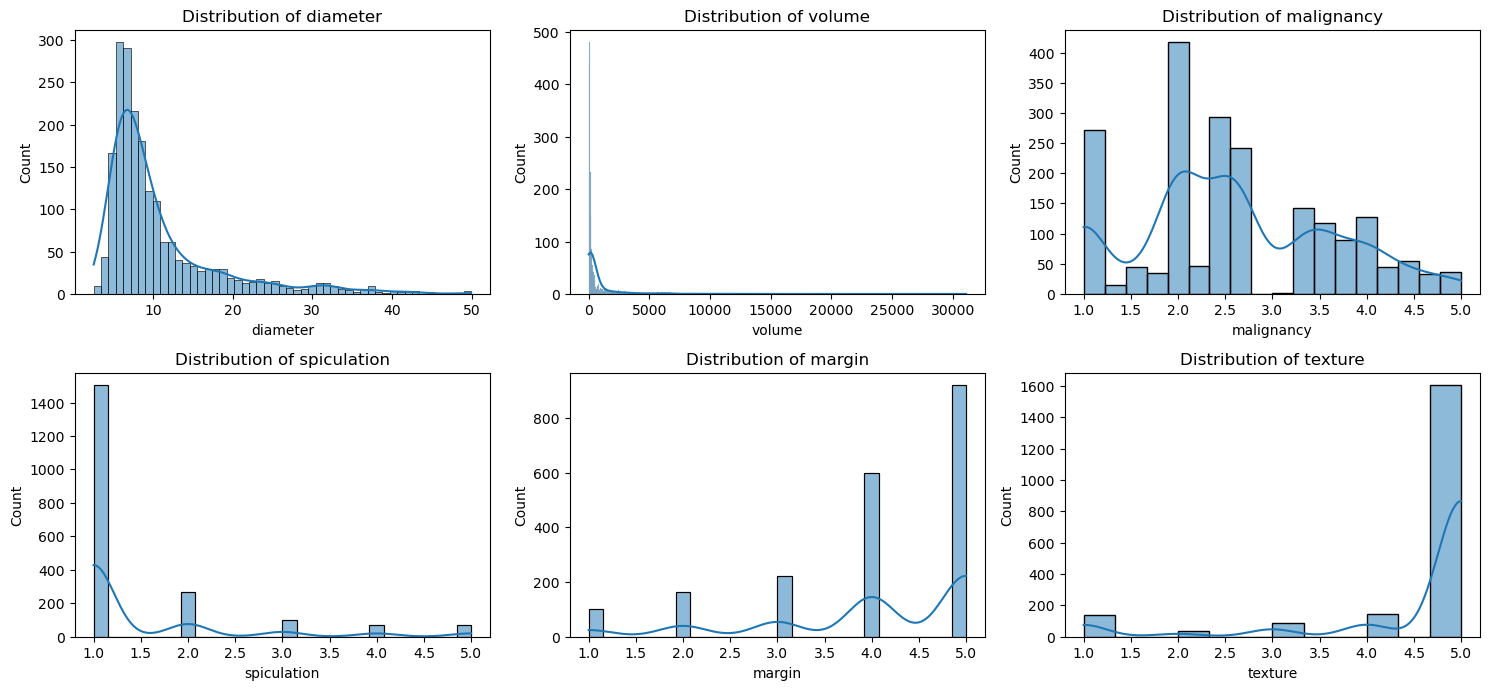

In [16]:
def plot_feature_distributions(df, features):
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(features):
        plt.subplot(3, 3, i + 1)
        sns.histplot(df[feature], kde=True)
        plt.title(f'Distribution of {feature}')
    plt.tight_layout()
    plt.show()

# Features to visualize
features_to_plot = ['diameter', 'volume', 'malignancy', 'spiculation', 'margin', 'texture']
plot_feature_distributions(df, features_to_plot)

### Correlation Heatmap

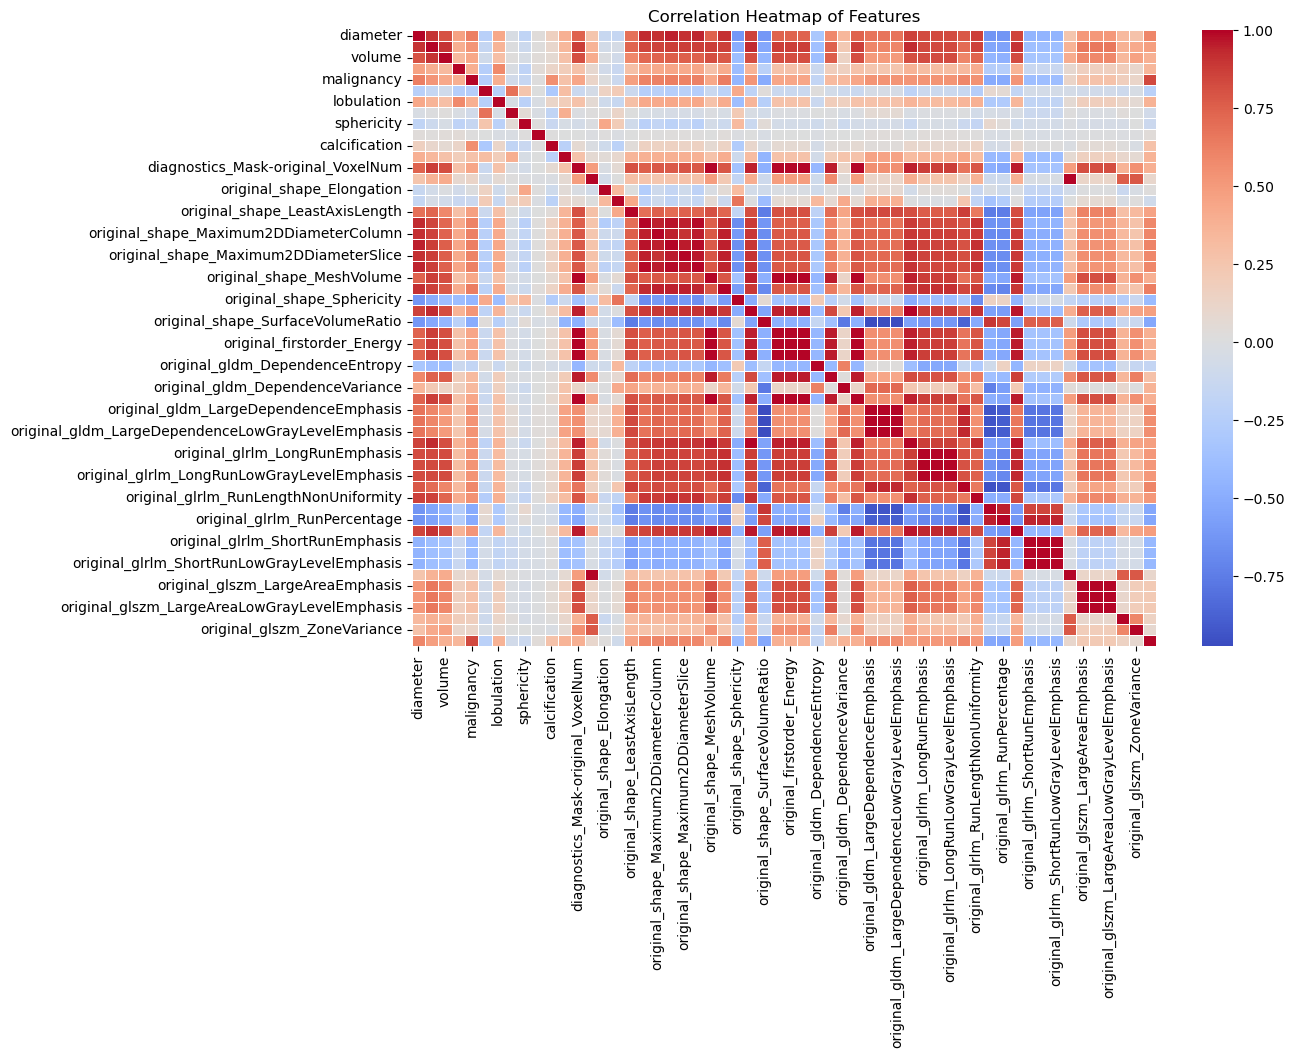

In [17]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

There are groups of features with high correlations (for example, "volume" and "diameter"), closer to 1, shown as dark red blocks, these indicate features that may provide similar information to the model. Since many features are highly correlated, some may be redundant, but we decided to keep them all to see how the model would perform

# Functions

### Function to train and evaluate models

In [18]:
def evaluate_model(model, param_grid, X_train, y_train, X_test, y_test, model_name):
    # Cross-validation with StratifiedKFold 
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    search = RandomizedSearchCV(model, param_grid, cv=cv, n_iter=10, scoring='roc_auc', n_jobs=-1, random_state=42, error_score='raise')
    search.fit(X_train, y_train)

    # Get the best model from the search
    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Collect predicted probabilities for AUC-ROC calculation
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Output the results
    print(f"\n{model_name}:")
    print("Best Parameters:", search.best_params_)
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Mean CV AUC-ROC:", search.best_score_)

    # Confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_name)
    
    # Return collected metrics for future analysis
    return {'Model': model_name, 'Accuracy': accuracy, 'AUC-ROC': auc_roc, 'Precision': precision, 'Recall': recall, 'F1-Score': f1, 'Mean CV AUC-ROC': search.best_score_}

### Function to plot the confusion matrix

In [19]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

### Function to plot individual graphs for each metric

In [20]:
def plot_individual_metrics(df_metrics):
    metrics = ['Accuracy', 'AUC-ROC', 'Precision', 'Recall', 'F1-Score']
    for metric in metrics:
        plt.figure(figsize=(10, 6))
        sns.barplot(x=df_metrics['Model'], y=df_metrics[metric])
        plt.title(f'Model Comparison - {metric}')
        plt.ylabel(f'{metric} Score')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Model Training and Testing

In [21]:
#Ignore specific warning messages
warnings.filterwarnings("ignore", category=UserWarning, message=".*WARNING:.*")
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", message="The total space of parameters .* is smaller than n_iter=10")

In [22]:
#Define hyperparameter grids to evaluate models
dt_param_grid = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None ,10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

svm_param_grid = {
    'C': [1, 10],
    'kernel': ['rbf'],
    'gamma': ['scale']
}

xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.1]
}

knn_param_grid = {
    'n_neighbors': [3, 5, 7] 
}

The objective of the code above is to help us find the best parameters, for the classification algorithms that need these. What happens is the code runs the algorithms with every combination possible of parameters that we provide and then outputs the one with best results.

In [23]:
#Initialize list to store model metrics
metrics_list = []

### Decision Tree


Decision Tree:
Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5}
Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.84      0.89       299
           1       0.64      0.85      0.73       101

    accuracy                           0.84       400
   macro avg       0.79      0.84      0.81       400
weighted avg       0.87      0.84      0.85       400

Mean CV AUC-ROC: 0.9154434777091607


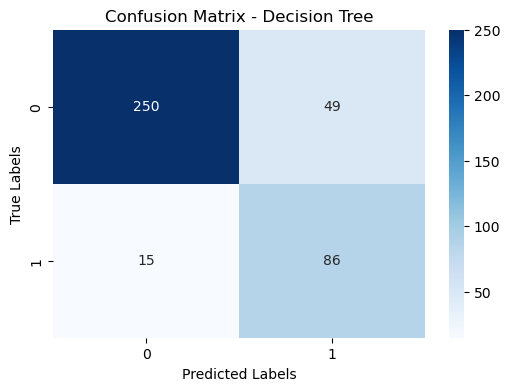

In [24]:
dt_model = DecisionTreeClassifier(random_state=42)
metrics_list.append(evaluate_model(dt_model, dt_param_grid, X_train, y_train, X_test, y_test, "Decision Tree"))

### Random Forest


Random Forest:
Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
Accuracy: 0.8775
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92       299
           1       0.73      0.81      0.77       101

    accuracy                           0.88       400
   macro avg       0.83      0.86      0.84       400
weighted avg       0.88      0.88      0.88       400

Mean CV AUC-ROC: 0.9551511252588586


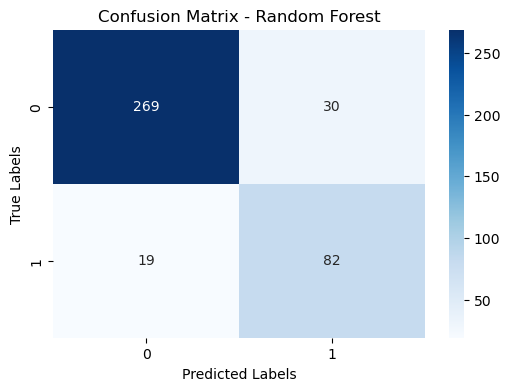

In [25]:
rf_model = RandomForestClassifier(random_state=42)
metrics_list.append(evaluate_model(rf_model, rf_param_grid, X_train, y_train, X_test, y_test, "Random Forest"))

### Logistic Regression


Logistic Regression:
Best Parameters: {}
Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.84      0.89       299
           1       0.65      0.88      0.75       101

    accuracy                           0.85       400
   macro avg       0.80      0.86      0.82       400
weighted avg       0.88      0.85      0.86       400

Mean CV AUC-ROC: 0.9382397260429174


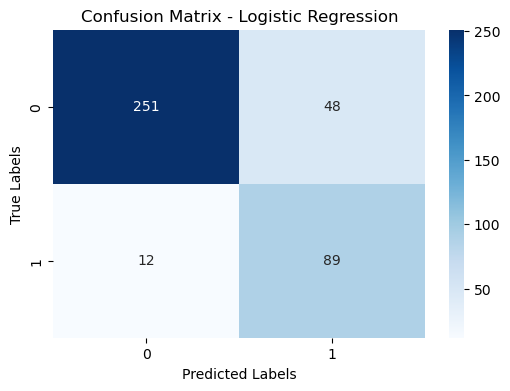

In [26]:
lr_model = LogisticRegression(random_state=42)
metrics_list.append(evaluate_model(lr_model, {}, X_train, y_train, X_test, y_test, "Logistic Regression"))

### Support Vector Machine


Support Vector Machine:
Best Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
Accuracy: 0.855
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.86      0.90       299
           1       0.67      0.85      0.75       101

    accuracy                           0.85       400
   macro avg       0.81      0.85      0.82       400
weighted avg       0.87      0.85      0.86       400

Mean CV AUC-ROC: 0.9450640366852661


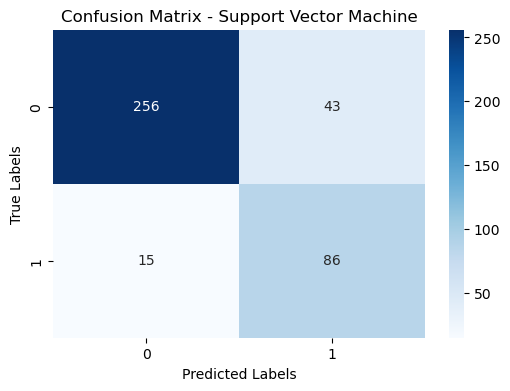

In [27]:
svm_model = SVC(probability=True, random_state=42)
metrics_list.append(evaluate_model(svm_model, svm_param_grid, X_train, y_train, X_test, y_test, "Support Vector Machine"))

### XGBoost


XGBoost:
Best Parameters: {'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.1}
Accuracy: 0.8825
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       299
           1       0.73      0.85      0.79       101

    accuracy                           0.88       400
   macro avg       0.84      0.87      0.85       400
weighted avg       0.89      0.88      0.89       400

Mean CV AUC-ROC: 0.9642284255604562


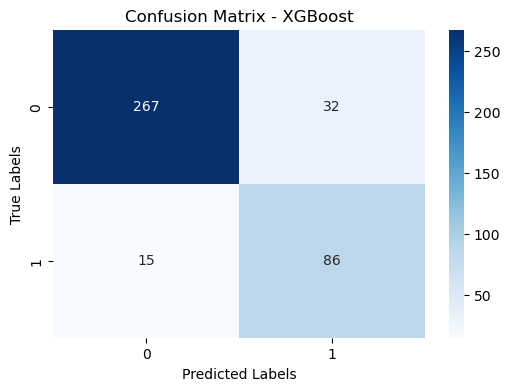

In [28]:
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
metrics_list.append(evaluate_model(xgb_model, xgb_param_grid, X_train, y_train, X_test, y_test, "XGBoost"))

### K-Nearest Neighbors


K-Nearest Neighbors:
Best Parameters: {'n_neighbors': 7}
Accuracy: 0.8525
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.85      0.90       299
           1       0.66      0.85      0.74       101

    accuracy                           0.85       400
   macro avg       0.80      0.85      0.82       400
weighted avg       0.87      0.85      0.86       400

Mean CV AUC-ROC: 0.9360917733155107


C:\Users\Benedita\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


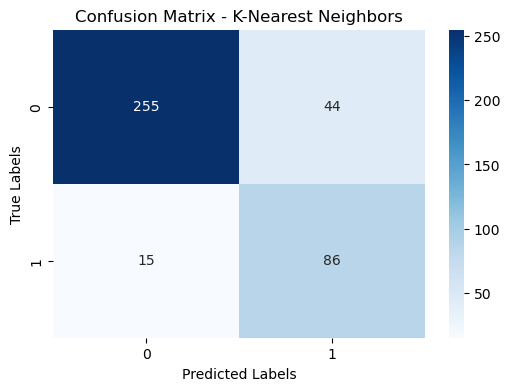

In [29]:
knn_model = KNeighborsClassifier()
metrics_list.append(evaluate_model(knn_model, knn_param_grid, X_train, y_train, X_test, y_test, "K-Nearest Neighbors"))

### Gaussian Naive Bayes (No hyperparameters to tune)


Gaussian Naive Bayes:
Best Parameters: {}
Accuracy: 0.855
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       299
           1       0.86      0.50      0.64       101

    accuracy                           0.85       400
   macro avg       0.86      0.74      0.77       400
weighted avg       0.86      0.85      0.84       400

Mean CV AUC-ROC: 0.9065360513158662


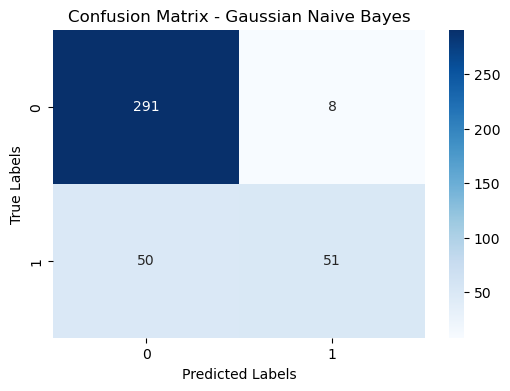

In [30]:
gnb_model = GaussianNB()
metrics_list.append(evaluate_model(gnb_model, {}, X_train, y_train, X_test, y_test, "Gaussian Naive Bayes"))

### Multinomial Naive Bayes (Requires MinMax scaling)


Multinomial Naive Bayes:
Best Parameters: {}
Accuracy: 0.8725
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92       299
           1       0.76      0.72      0.74       101

    accuracy                           0.87       400
   macro avg       0.83      0.82      0.83       400
weighted avg       0.87      0.87      0.87       400

Mean CV AUC-ROC: 0.8880920790123273


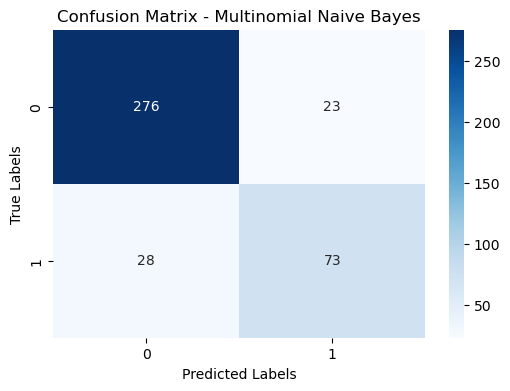

In [31]:
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)
mnb_model = MultinomialNB()
metrics_list.append(evaluate_model(mnb_model, {}, X_train_minmax, y_train, X_test_minmax, y_test, "Multinomial Naive Bayes"))

# Comparing Models

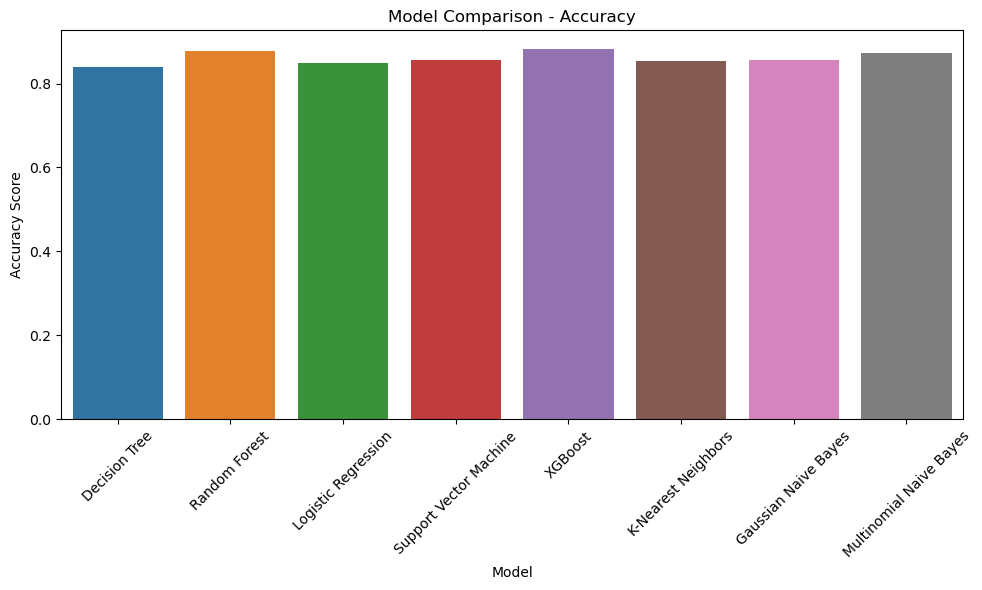

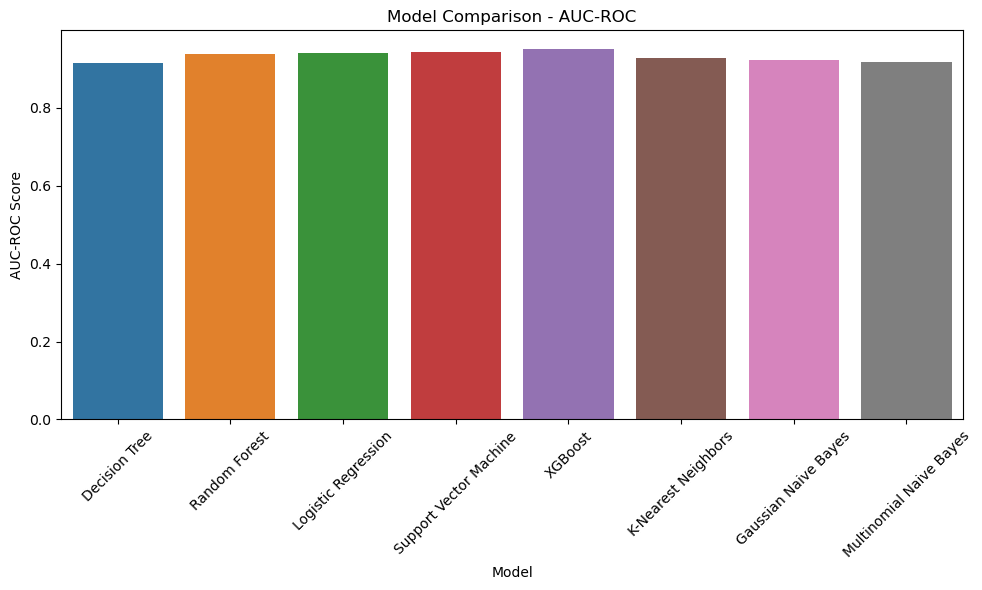

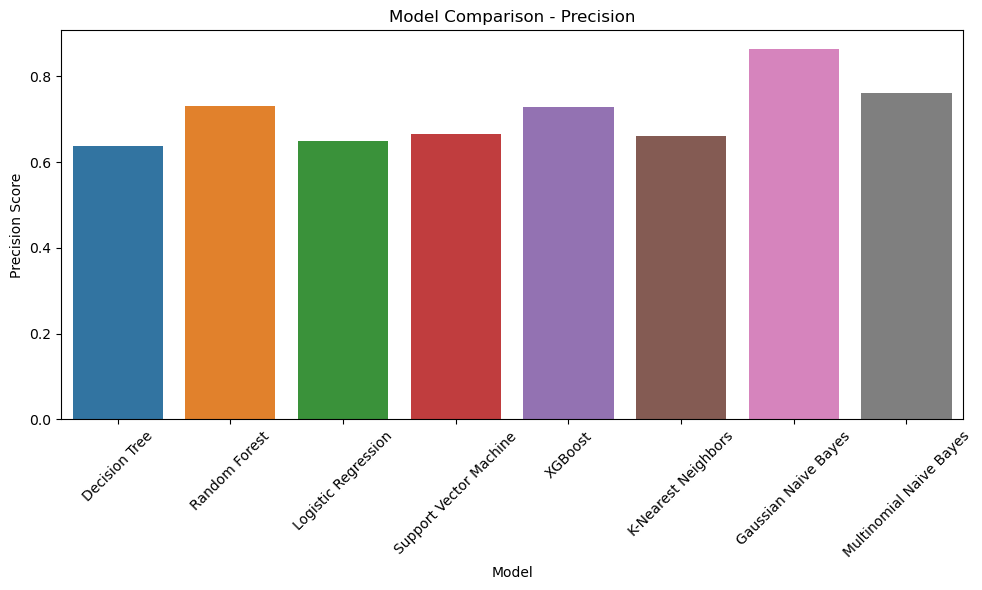

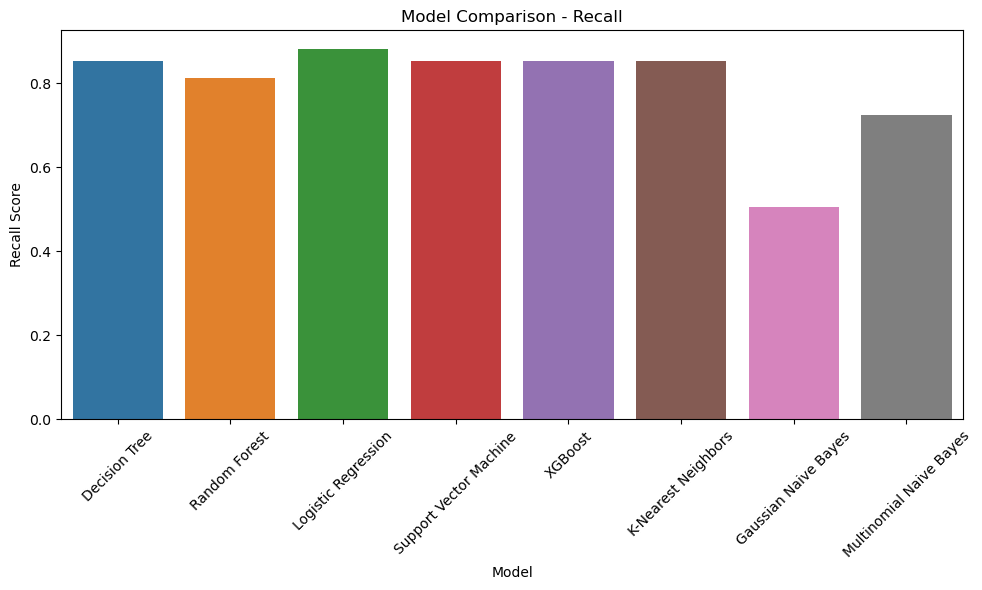

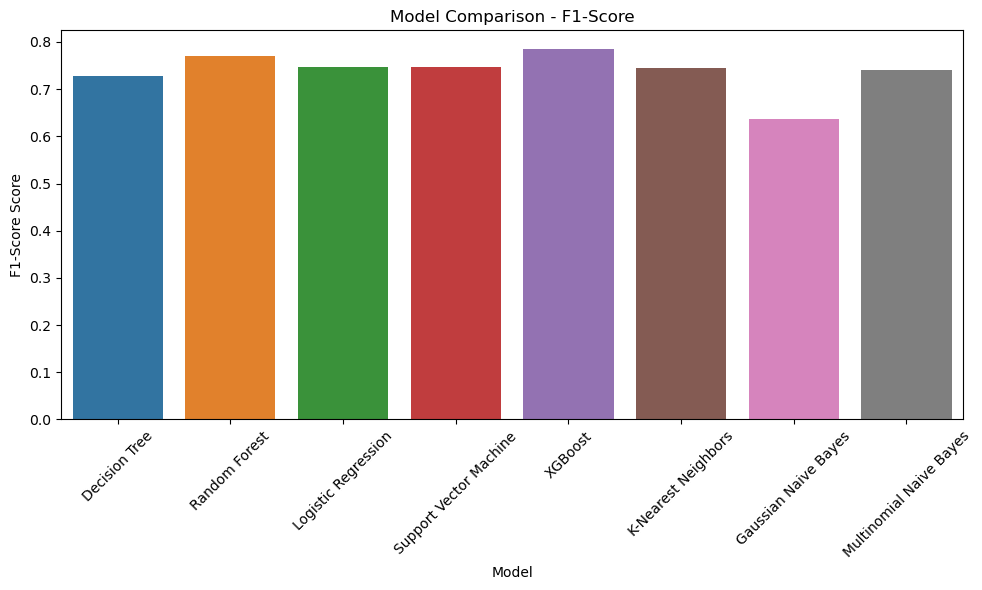

In [32]:
# Create DataFrame from metrics list and plot comparison for each metric
df_metrics = pd.DataFrame(metrics_list)
plot_individual_metrics(df_metrics)

# Conclusion

In conclusion, this project highlights the potential of combining CT data with machine learning techniques for enhancing lung cancer diagnosis. By integrating clinical imaging data with powerful machine learning models, we have developed a solution that could contribute to early detection and improved patient outcomes in the clinical setting.

Our results demonstrated that all our models behaved particullary well around all metrics, except for some exceptions, as the Gaussian Naive Bayes didn't do very well in F1-Score and Recall. These models offer a strong foundation for automating lung nodule classification, showing promise for real-world applications in medical diagnostics where accurate and timely detection is critical.

# References

# [CZM+18]

Jason L. Causey, Junyu Zhang, Shiqian Ma, Bo Jiang, Jake A. Qualls, David G. Politte,
Fred Prior, Shuzhong Zhang, and Xiuzhen Huang. Highly accurate model for prediction
of lung nodule malignancy with CT scans. Scientific Reports, 2018.